# Calibrate Camera
Adjust hardware parameters e.g. perspective etc.


**References:**

https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

In [7]:

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import utils

## Sample Image
Load image in gray scale because the following operations require gray scale and binary image (boolean) image.

In [8]:
filename = "left01.jpg"

In [9]:
filepath = f"sample-data/{filename}"
try:
    utils.getCvSample(filename, filepath)
except:
    assert os.path.isfile(filepath), FileNotFoundError(filepath)
print("Source image file:", filepath)

# NOTE Alternative function but somehow this does not work
# cv2.samples.findFile("smarties.png")


Source image file: sample-data/left01.jpg


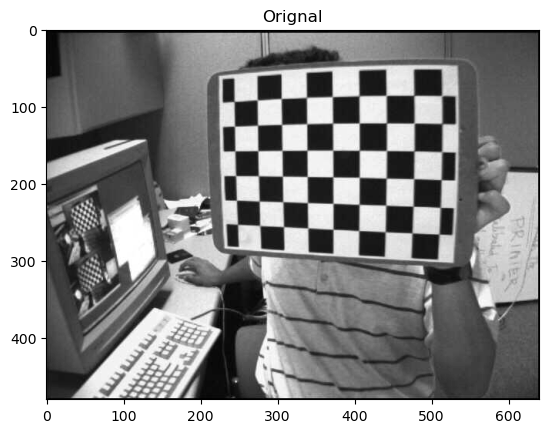

(<matplotlib.image.AxesImage at 0x13ec79e10>, Text(0.5, 1.0, 'Orignal'), None)

In [ ]:
orgImg = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(orgImg, 'gray'), plt.title("Orignal"), plt.show()

## Calibration

In [11]:
chessSize = (7,6)

Corner size: (42, 1, 2)
Head: [[475.4542 264.6474]]


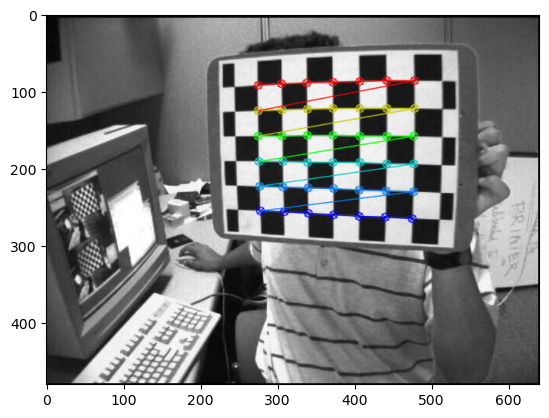

(<matplotlib.image.AxesImage at 0x13eda36d0>, None)

In [12]:
ret, corners = cv2.findChessboardCorners(orgImg, chessSize, None)
print("Corner size:", corners.shape)
print("Head:", corners[0])
showImg = cv2.drawChessboardCorners(cv2.cvtColor(orgImg, cv2.COLOR_GRAY2RGB), chessSize, corners, ret)
plt.imshow(showImg), plt.show()

Corner size: (42, 1, 2)
Head: [[475.46497 264.59277]]


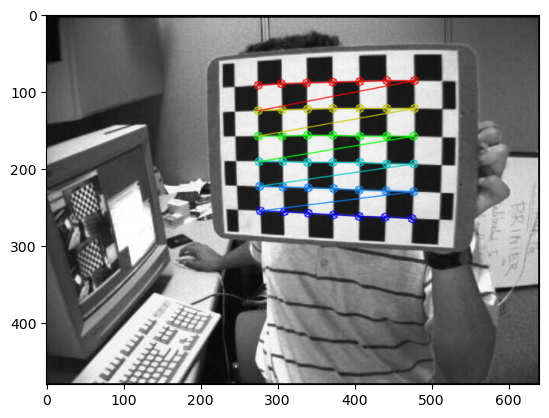

(<matplotlib.image.AxesImage at 0x797bc6991270>, None)

In [50]:
ret, corners = cv2.findChessboardCorners(orgImg, chessSize, None)
print("Corner size:", corners.shape)
print("Head:", corners[0])
showImg = cv2.drawChessboardCorners(cv2.cvtColor(orgImg, cv2.COLOR_GRAY2RGB), chessSize, corners, ret)
plt.imshow(showImg), plt.show()

In [13]:
objPoints = np.zeros((chessSize[0]*chessSize[1], 3), np.float32)
objPoints[:,:2] = np.mgrid[:7,:6].T.reshape(-1,2)

In [15]:
cv2.calibrateCamera([objPoints], [corners], orgImg.shape, None, None)

(0.2316843922200758,
 array([[1.07745177e+03, 0.00000000e+00, 2.65049436e+02],
        [0.00000000e+00, 9.86628947e+02, 3.75937359e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[ -1.31838726,   3.83956101,  -0.13071134,   0.07449552,
         -16.61754821]]),
 (array([[-0.79747517],
         [ 0.50436863],
         [-2.9595862 ]]),),
 (array([[ 5.54330342],
         [-3.07690366],
         [28.9358175 ]]),))